In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Cargamos nuestro archivo CSV previamente ya preparado para su analisis, donde lo cargamos con la libreria pandas y mostramos las primeras 5 filas
df = pd.read_csv('Final.csv')

#Eliminamos la categoria de id de las columnas, esta no es necesaria en general solo es 1 categoria y ya se tiene el nombre
#creamos un df de la correlacion unicamente de los valores numericos
df = df.drop(columns=['ID_CATEGORY'])
dfCorr = df.corr(numeric_only=True)

#De nuestro DF principal nos aseguramos que sea de tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['BRAND'] == 'VANISH']

#Agrupamos un nuevo DF por AÑO y por semana del año sumando el total de de unidades y de venta, ordenandolo primero por año y luego por semana del año
dfYearWeekNumberSales = (df.groupby(['YEAR','WEEK_NUMBER'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].
    sum().reset_index().sort_values(by=['YEAR','WEEK_NUMBER'], ascending = [True,True]))

#Sacamos la media de las venta semanal por cada año y lo guardamos en otro DF
dfMeansWeekPerYear = (df.groupby(['YEAR','WEEK_NUMBER'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum().reset_index()
    .groupby(['YEAR'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].mean().reset_index())

dfYearWeekNumberSales

,YEAR,WEEK_NUMBER,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES
0,2021,52,42.482,1148.872
1,2022,5,54.792,1933.647
2,2022,9,46.494,1652.413
3,2022,13,77.478,2086.611
4,2022,14,25.431,421.056
...,...,...,...,...
61,2023,31,29.572,950.055
62,2023,35,38.145,1231.529
63,2023,39,31.763,953.656
64,2023,44,29.272,872.290


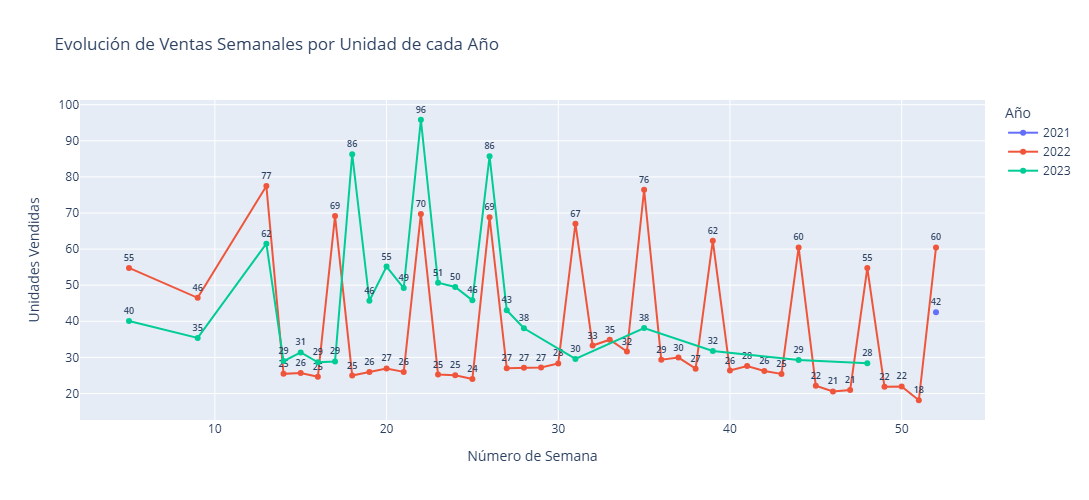

In [16]:
fig = px.line(
    dfYearWeekNumberSales, 
    x="WEEK_NUMBER",
    y="TOTAL_UNIT_SALES",
    text=dfYearWeekNumberSales['TOTAL_UNIT_SALES'].round(0),
    color="YEAR",
    markers=True,
    title="Evolución de Ventas Semanales por Unidad de cada Año",
    labels={
        "WEEK_NUMBER": "Número de Semana",
        "TOTAL_UNIT_SALES": "Unidades Vendidas",
        "YEAR": "Año"
    },
    height=500
)
fig.update_traces(
    textposition="top center",
    textfont=dict(size=9, weight="bold")  
)
fig.show()

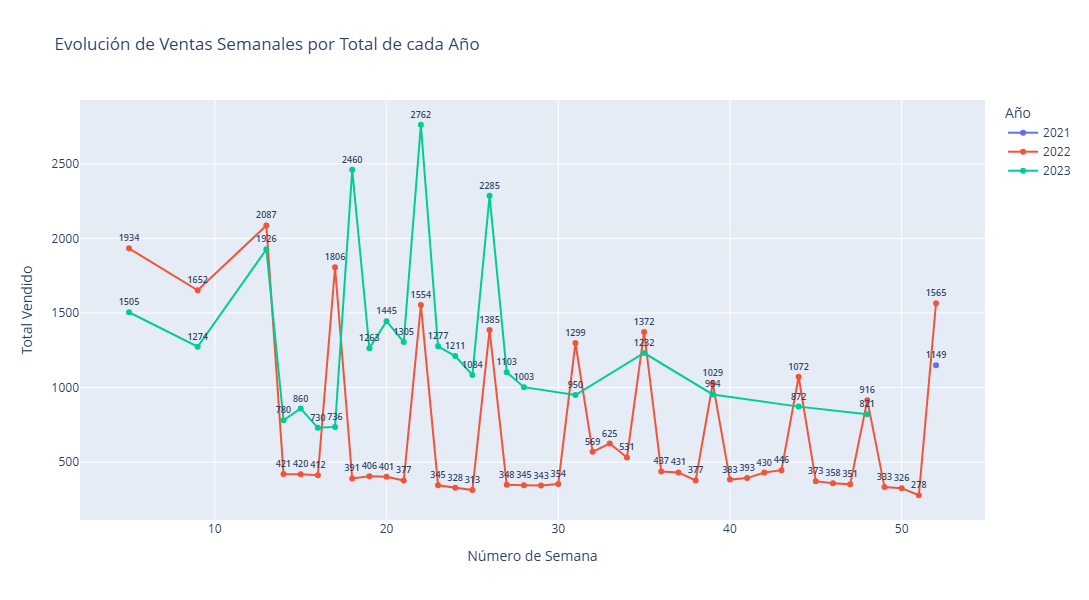

In [17]:
fig = px.line(
    dfYearWeekNumberSales, 
    x="WEEK_NUMBER",
    y="TOTAL_VALUE_SALES",
    text=dfYearWeekNumberSales['TOTAL_VALUE_SALES'].round(0),
    color="YEAR",
    markers=True,
    title="Evolución de Ventas Semanales por Total de cada Año",
    labels={
        "WEEK_NUMBER": "Número de Semana",
        "TOTAL_VALUE_SALES": "Total Vendido",
        "YEAR": "Año"
    },
    height=600
)
fig.update_traces(
    textposition="top center",
    textfont=dict(size=9, weight="bold")  
)
fig.show()